In [1]:
import skimage
import skimage.io
import os, sys
import utils
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

## Read in male and femal face 50 coeficients

In [2]:
mdict = scipy.io.loadmat("LDA_Eigen_Face_Coef.mat")
male_coef = mdict["male_coef"]
female_coef = mdict["female_coef"]

## Train Test split

In [4]:
train_male= male_coef[:330, :]
train_female = female_coef[:470, :]

test_male = male_coef[330:]
test_female = female_coef[470:]

## Calculate mean coef

In [8]:
male_mean = np.expand_dims(np.mean(train_male, axis = 0), axis = 0)
female_mean = np.expand_dims(np.mean(train_female, axis = 0), axis = 0)

## Calculate scatter matrix

In [12]:
Sw = np.matmul((train_male - male_mean).T, (train_male - male_mean)) + np.matmul((train_female - female_mean).T, (train_female - female_mean))

## Calculate fisher face

In [17]:
w = np.matmul(np.linalg.inv(Sw), (male_mean - female_mean).T)

In [18]:
w.shape

(50, 1)

## Calculate the error rate

In [37]:
ans_male = np.matmul(test_male, w)

In [38]:
ans_female = np.matmul(test_female, w)

In [39]:
err = (np.sum(ans_male < 0) + np.sum(ans_female > 0)) / (ans_male.size + ans_female.size)

In [40]:
err

0.13500000000000001

## Plot the result

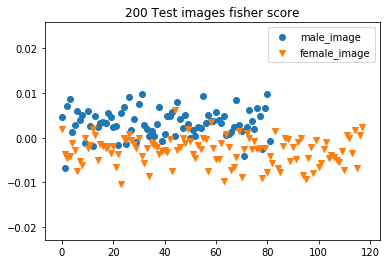

In [43]:
fig = plt.figure()
plt.clf()
plt.scatter([x for x in range(len(ans_male))], ans_male, marker = 'o', label = "male_image")
plt.scatter([x for x in range(len(ans_female))], ans_female, marker = 'v', label = "female_image")
plt.title("200 Test images fisher score")
plt.legend()
plt.show()
fig.savefig("11_200_test_fisher_score.png")